In [1]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [23]:
# define the true objective function
def objective(k, q, eta):
 return (1-(1-q)*(k/eta))**(1/(1-q))

In [28]:
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
N = 10**5
alpha_a = 0.0
dataframe = read_csv(f"../data/N_{N}_distributions/dim_{1}_alpha_a_{alpha_a}_alpha_g_{2.0}.csv")
#data = dataframe.values

# choose the input and output variables
x, y = dataframe["k"].values, dataframe["pk"].values
# # curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print(f"q = {a}, eta = {b}")

q = 0.9999999851113665,eta = 1.5154032557517045


/tmp/ipykernel_19185/560343145.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (1-(1-q)*(k/eta))**(1/(1-q))


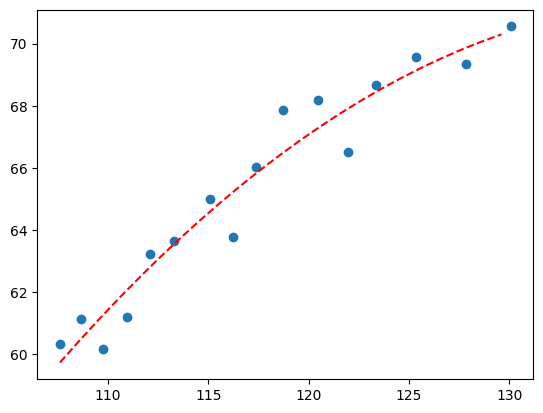

In [4]:
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()